Recognizing 3 and 4 from images
===============================

## Load data

In [1]:
from utils.recognize_numbers import *

In [2]:
data = load_data()
print(f"Loaded {len(data)} images containing 3 or 4")

Loaded 1186 images containing 3 or 4


## Plot data

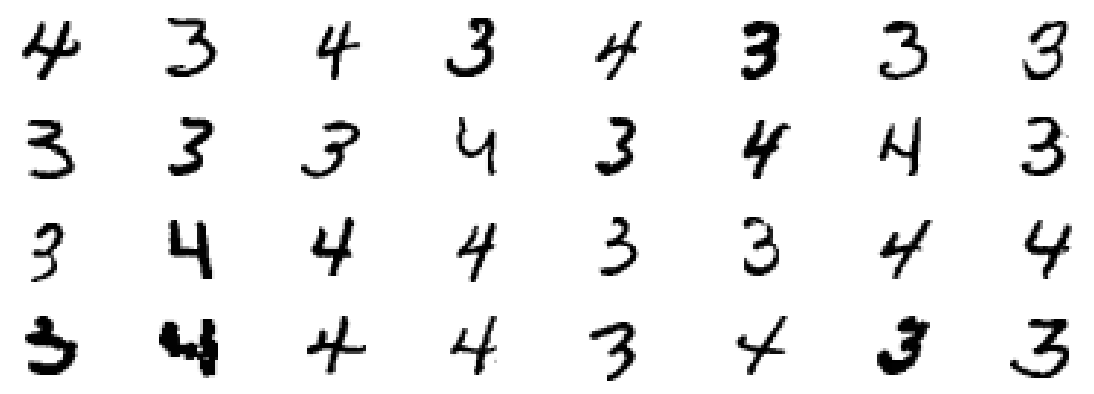

In [3]:
images = [image for image, label in data[:32]]
plot_data_sample(images)

/home/josef/dev/fsv_presentation/utils/recognize_numbers.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


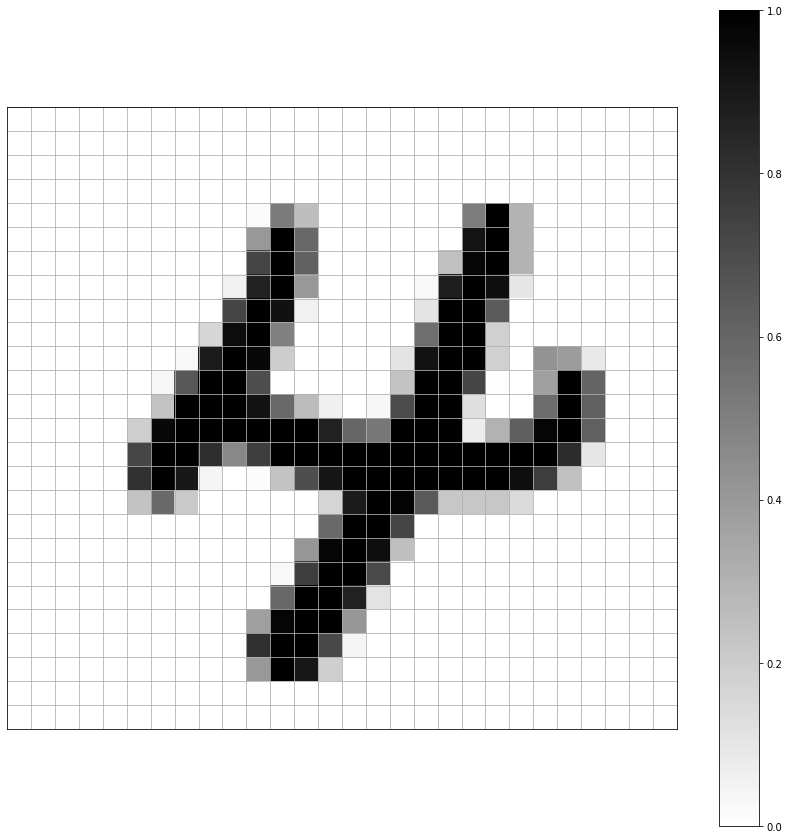

In [4]:
image, label = data[0]
plot_image(image)

## Generate random mask

In [5]:
random_mask = generate_random_mask()

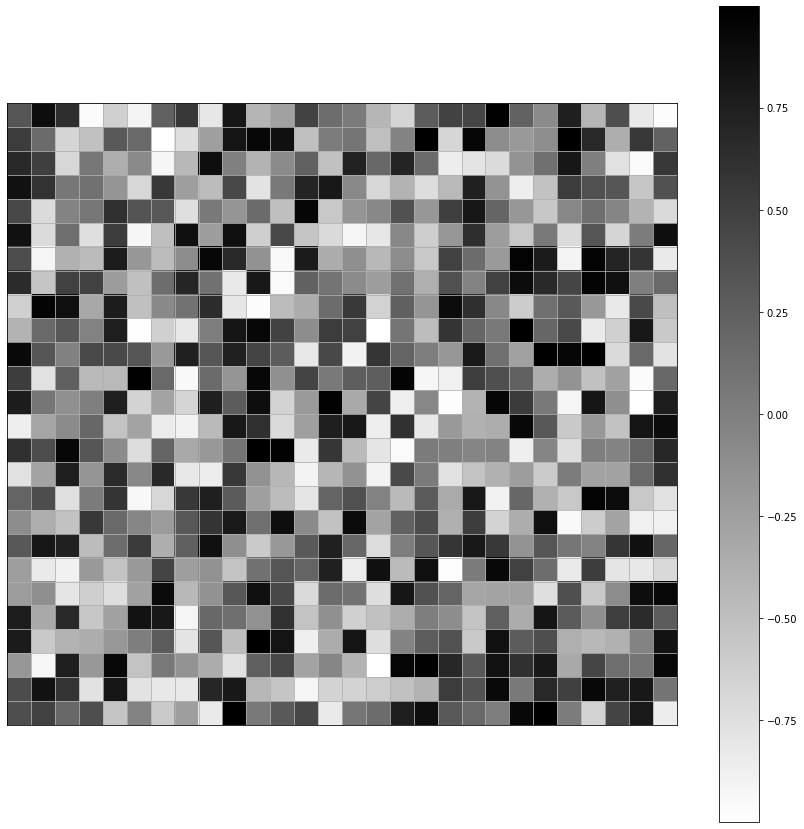

In [6]:
plot_image(random_mask)

In [7]:
correct_prediction_percentage = evaluate_mask(random_mask, data)
print(f"Mask has about {(int)(correct_prediction_percentage * 100):.2f} % of predictions correct.")

Mask has about 45.00 % of predictions correct.


## Find good mask

In [8]:
np.random.seed(647685)

best_mask = None

best_correct_prediction_percentage = 0.

while True: 
    random_mask = generate_random_mask()
    correct_prediction_percentage = evaluate_mask(random_mask, data)
    
    if correct_prediction_percentage > best_correct_prediction_percentage:
        best_correct_prediction_percentage = correct_prediction_percentage
        best_mask = random_mask
        
        print(f"Best mask score so far: {(correct_prediction_percentage * 100) :.2f} %")
    
    if best_correct_prediction_percentage > 0.9: 
        break

Best mask score so far: 54.72 %
Best mask score so far: 61.97 %
Best mask score so far: 66.78 %
Best mask score so far: 70.40 %
Best mask score so far: 70.57 %
Best mask score so far: 76.39 %
Best mask score so far: 78.41 %
Best mask score so far: 82.97 %
Best mask score so far: 93.34 %


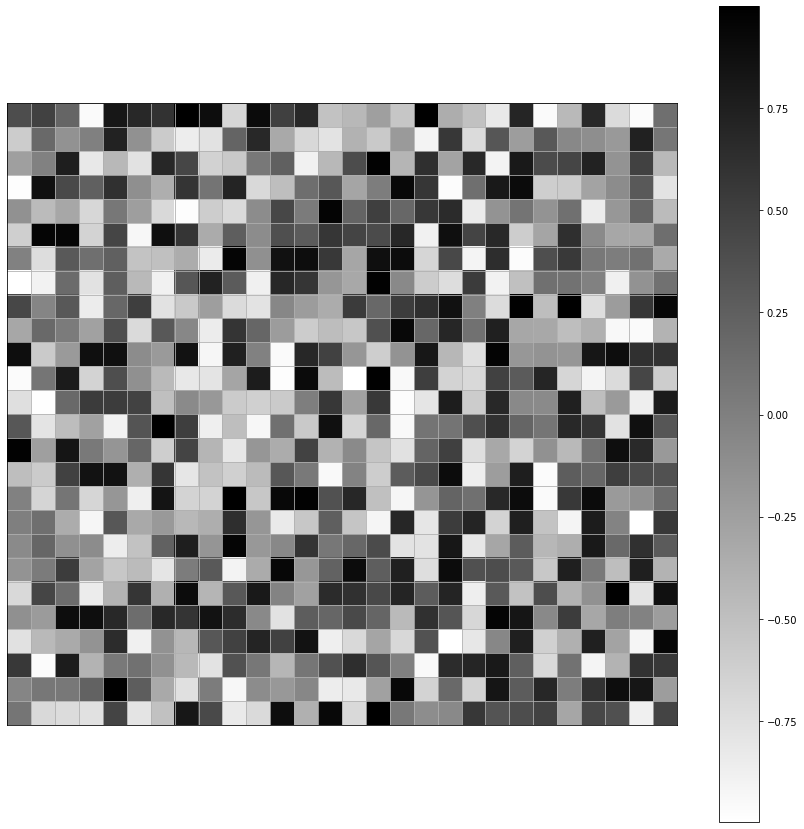

In [9]:
plot_image(best_mask)

In [10]:
f"Mask has about {evaluate_mask(best_mask, data)*100 :.2f} % of predictions correct."

'Mask has about 93.34 % of predictions correct.'

## Try to predict using that mask 

In [11]:
predictions = [predict(best_mask, image) for image, label in data[:32]]

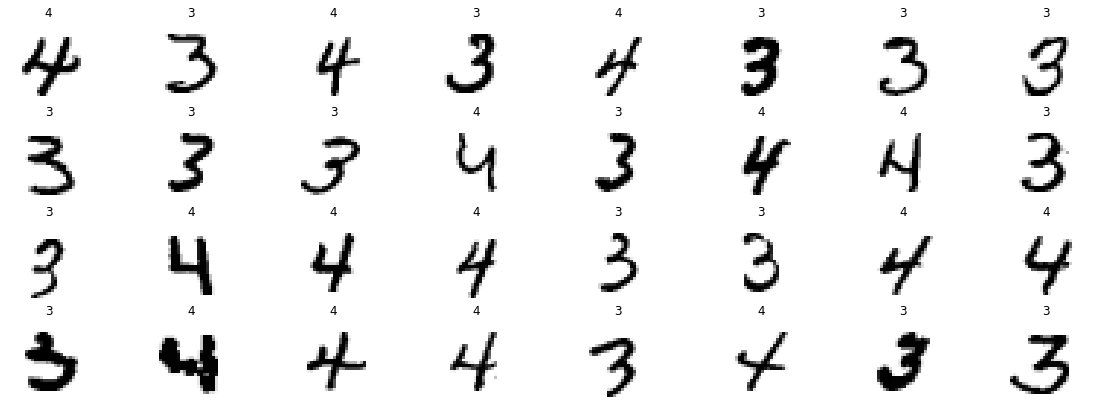

In [12]:
plot_data_sample(images, predictions)